Text Mining AOL

Group 8:
- 2502004102 - Musyaffa Ayman Rafif
- 2501987772 - Salomo Hendrian Sudjono
- 2501996505 - Grace Shirley Cam

# Resume Classification using Machine Learning Models

## 1. Setup Notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from yellowbrick.model_selection import LearningCurve

In [3]:
df = pd.read_csv('data/Resume.csv')

## 2. Data Preprocessing

In [4]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
selected_columns = ['Resume_str', 'Category']
df = df[selected_columns]
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


### Data Cleaning

In [6]:
def text_cleansing(df):
    df_clean = [text.lower() for text in df]
    df_clean = [re.sub(r"\d+", "", text) for text in df_clean]
    df_clean = [re.sub(r'[^\w]', ' ', text) for text in df_clean]
    df_clean = [re.sub(r'\s+', ' ', text) for text in df_clean]
    return df_clean


In [7]:
df['Cleaned_text'] = text_cleansing(df['Resume_str'])

In [8]:
df.head()

,Resume_str,Category,Cleaned_text
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in ...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [9]:
cleaned_columns = ['Cleaned_text', 'Category']
df_cleaned = df[cleaned_columns]
df_cleaned.head()

,Cleaned_text,Category
0,hr administrator marketing associate hr admin...,HR
1,hr specialist us hr operations summary versat...,HR
2,hr director summary over years experience in ...,HR
3,hr specialist summary dedicated driven and dy...,HR
4,hr manager skill highlights hr skills hr depa...,HR


In [10]:
df_cleaned.to_csv('data/Resume_clean.csv') # Save dulu

### Tokenization

In [11]:
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(word_tokenize_wrapper)
df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_19876\955287719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(word_tokenize_wrapper)


,Cleaned_text,Category
0,"[hr, administrator, marketing, associate, hr, ...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, over, years, experienc...",HR
3,"[hr, specialist, summary, dedicated, driven, a...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR


### Remove Stopwords

In [12]:
list_stopwords = stopwords.words('english')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(stopwords_removal)
df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_19876\2881813264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(stopwords_removal)


,Cleaned_text,Category
0,"[hr, administrator, marketing, associate, hr, ...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, years, experience, rec...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR


### Lemmatization

In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text

df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(lambda tokens: lemmatization(tokens))

df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_19876\3925164240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(lambda tokens: lemmatization(tokens))


,Cleaned_text,Category
0,hr administrator marketing associate hr admini...,HR
1,hr specialist u hr operation summary versatile...,HR
2,hr director summary year experience recruiting...,HR
3,hr specialist summary dedicated driven dynamic...,HR
4,hr manager skill highlight hr skill hr departm...,HR


In [14]:
df_cleaned['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [15]:
df_cleaned

,Cleaned_text,Category
0,hr administrator marketing associate hr admini...,HR
1,hr specialist u hr operation summary versatile...,HR
2,hr director summary year experience recruiting...,HR
3,hr specialist summary dedicated driven dynamic...,HR
4,hr manager skill highlight hr skill hr departm...,HR
...,...,...
2479,rank sgt e non commissioned officer charge bri...,AVIATION
2480,government relation communication organization...,AVIATION
2481,geek squad agent professional profile support ...,AVIATION
2482,program director office manager summary highly...,AVIATION


## 3. Exploratory Data Analysis

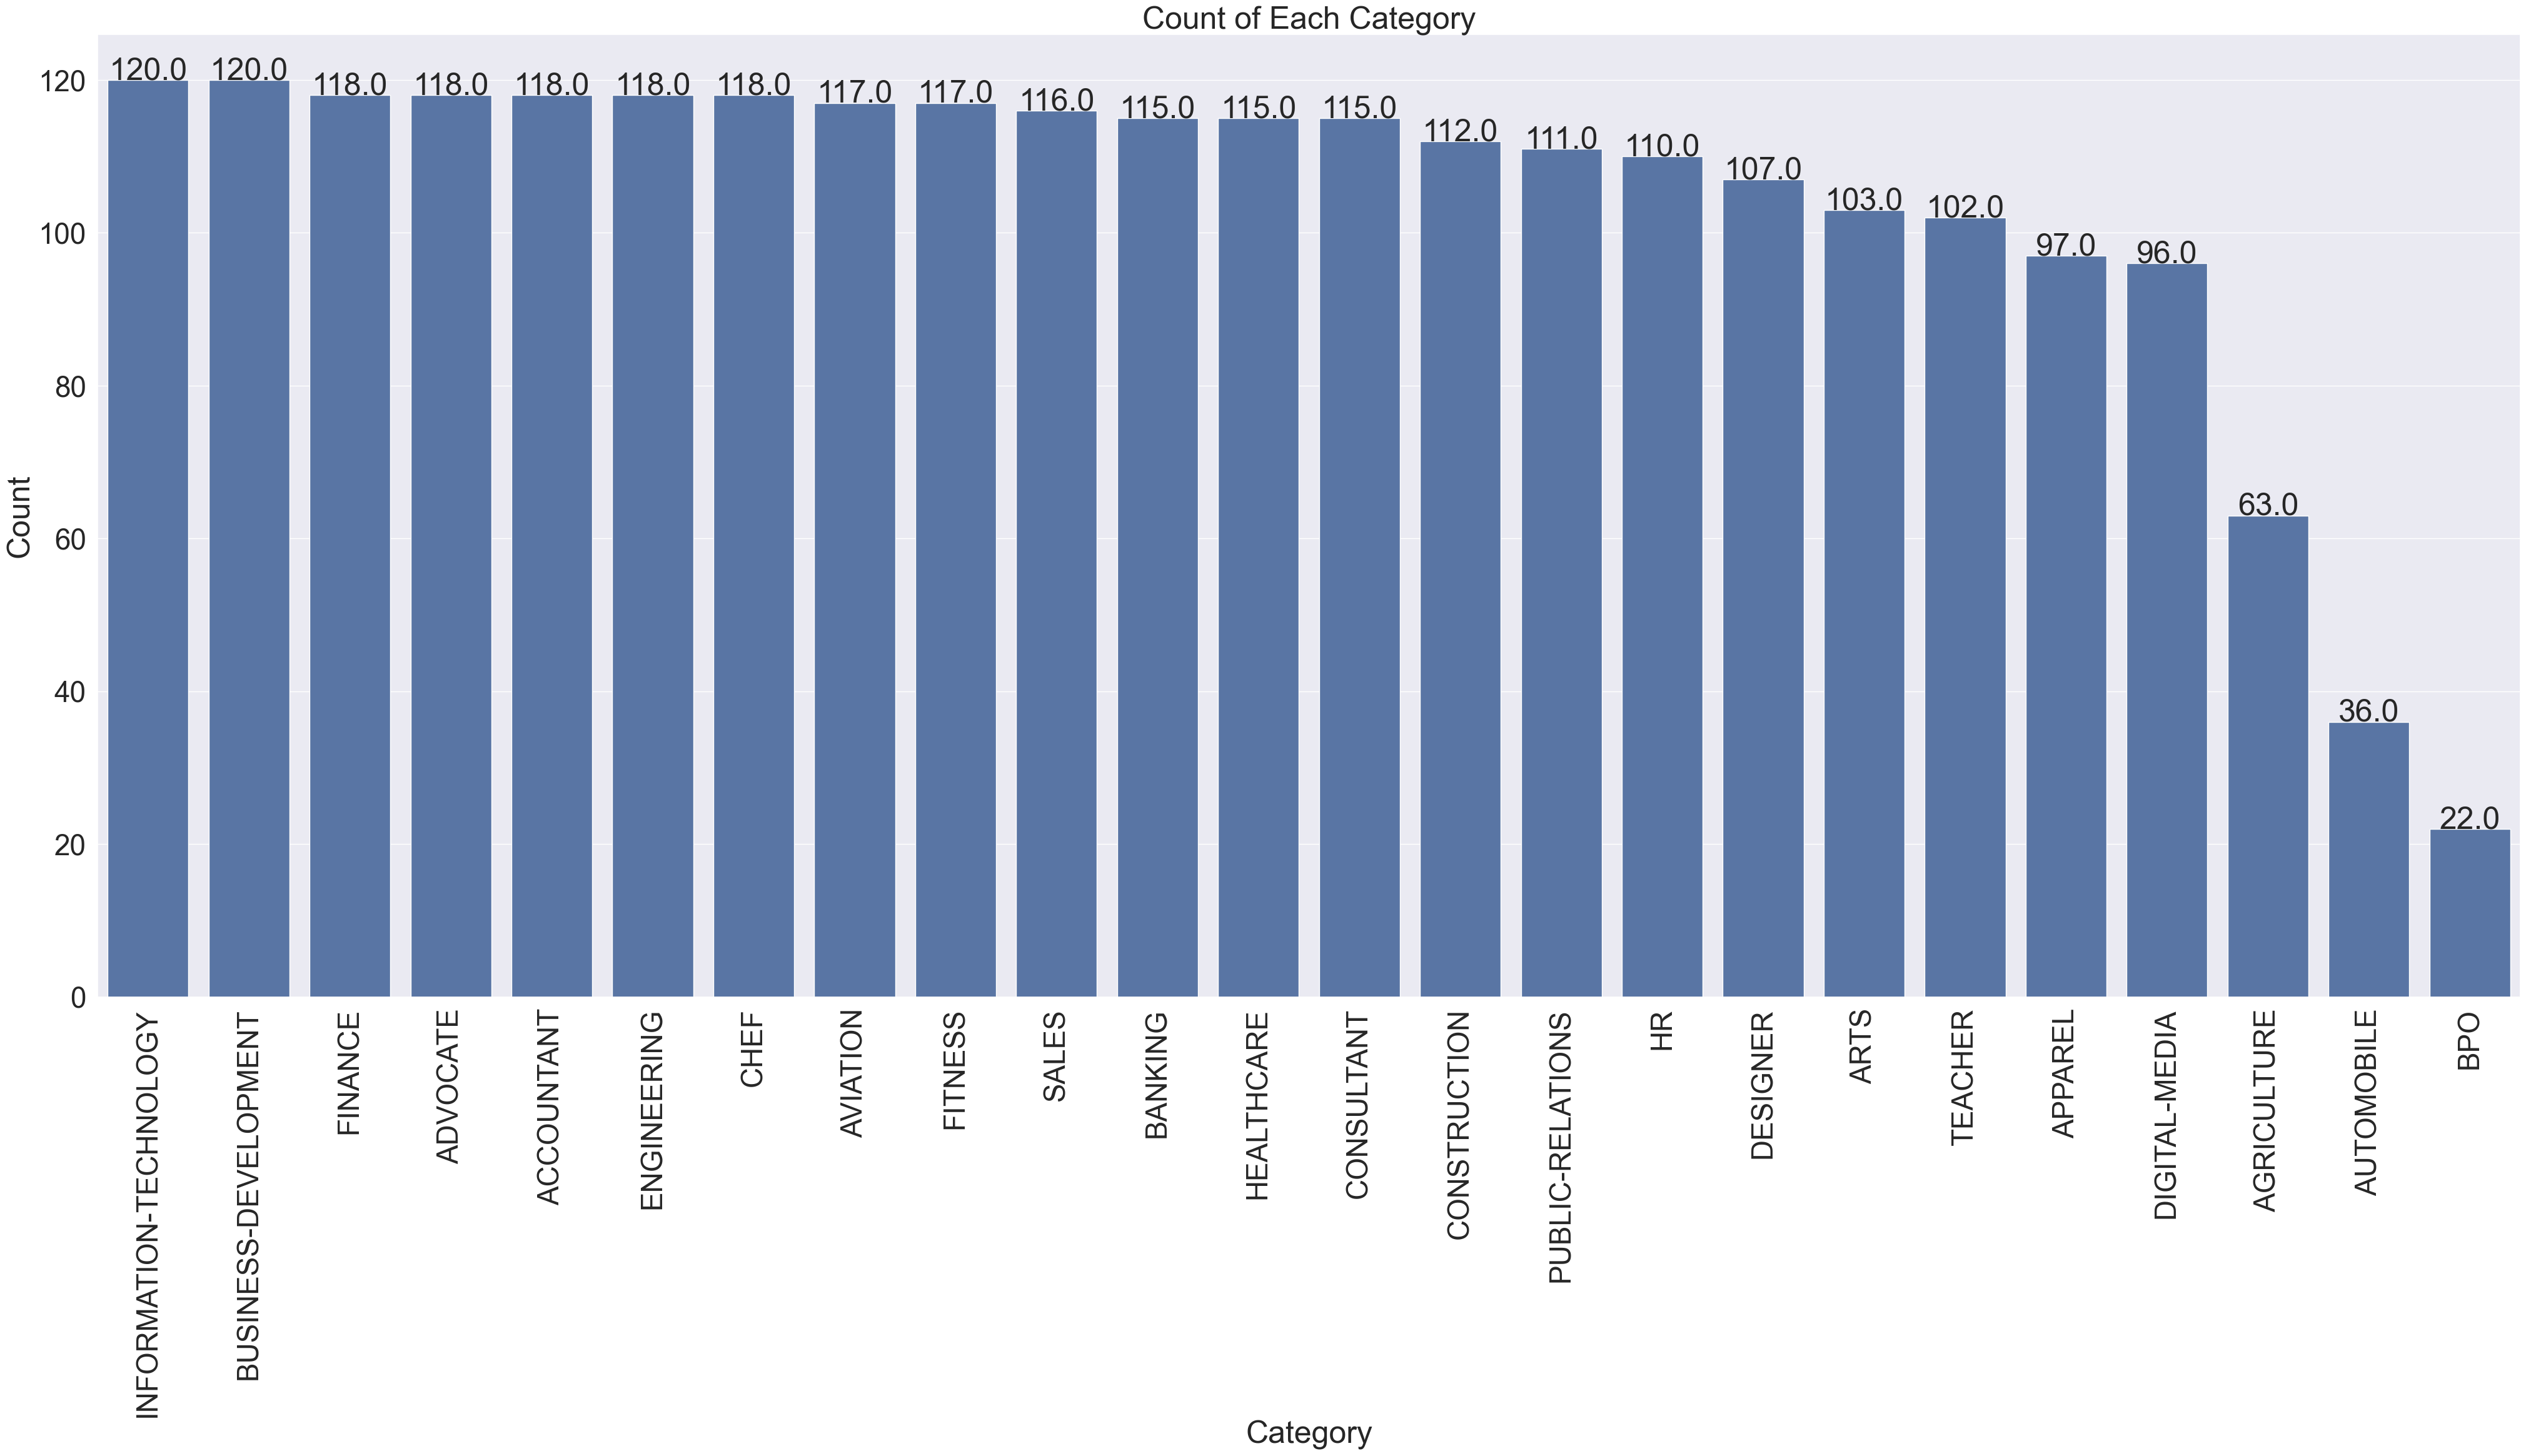

In [16]:
sns.set(font_scale=3)  
plt.figure(figsize=(50, 20))  

category_counts = df_cleaned['Category'].value_counts()
category_order = category_counts.index
color_palette = sns.color_palette("Set2", len(category_order))

ax = sns.countplot(data=df_cleaned, x='Category', order=category_counts.index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.xticks(rotation=90)

plt.show()

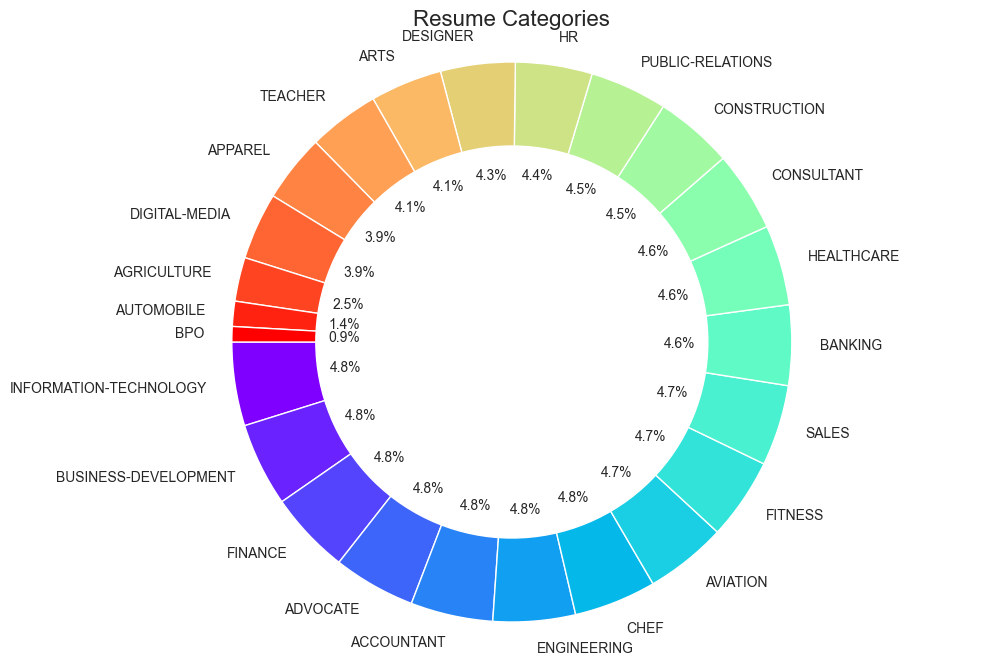

In [17]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(category_counts.index)))

plt.figure(figsize=(12, 8))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        shadow=False, 
        colors=colors, 
        startangle=180, 
        textprops={'fontsize': 10})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title("Resume Categories", fontsize=16)
plt.show()

## 4. Text Representation

### Label Encoding

In [18]:
label_to_numeric = {
    'INFORMATION-TECHNOLOGY': 1,
    'BUSINESS-DEVELOPMENT': 2,
    'FINANCE': 3,
    'ADVOCATE': 4,
    'ACCOUNTANT': 5,
    'ENGINEERING': 6,
    'CHEF': 7,
    'AVIATION': 8,
    'FITNESS': 9,
    'SALES': 10,
    'BANKING': 11,
    'HEALTHCARE': 12,
    'CONSULTANT': 13,
    'CONSTRUCTION': 14,
    'PUBLIC-RELATIONS': 15,
    'HR': 16,
    'DESIGNER': 17,
    'ARTS': 18,
    'TEACHER': 19,
    'APPAREL': 20,
    'DIGITAL-MEDIA': 21,
    'AGRICULTURE': 22,
    'AUTOMOBILE': 23,
    'BPO': 24
}

df_cleaned['Labeled_category'] = df_cleaned['Category'].map(label_to_numeric)

### Train Test Split & BoW

In [19]:
def preprocess_text_data(data, target, test_size=0.3, random_state=24):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=test_size, random_state=random_state, stratify=target
    )
    
    vectorizer_train = CountVectorizer()

    X_train_bow = vectorizer_train.fit_transform(X_train)

    feature_names = vectorizer_train.get_feature_names_out()

    bow_array_train = X_train_bow.toarray()

    X_test_bow = vectorizer_train.transform(X_test)

    bow_array_test = X_test_bow.toarray()

    return X_train_bow, X_test_bow, y_train, y_test, feature_names, bow_array_train, bow_array_test


X_train_bow, X_test_bow, y_train, y_test, feature_names, bow_array_train, bow_array_test = preprocess_text_data(
    df_cleaned['Cleaned_text'], df_cleaned['Labeled_category']
)

In [20]:
y_train.value_counts()

Labeled_category
1     84
2     84
4     83
6     83
5     83
7     83
3     83
9     82
8     82
10    81
13    80
11    80
12    80
14    78
15    78
16    77
17    75
18    72
19    71
20    68
21    67
22    44
23    25
24    15
Name: count, dtype: int64

In [21]:
y_test.value_counts()

Labeled_category
1     36
2     36
9     35
7     35
13    35
4     35
6     35
11    35
8     35
3     35
5     35
10    35
12    35
14    34
15    33
16    33
17    32
18    31
19    31
21    29
20    29
22    19
23    11
24     7
Name: count, dtype: int64

In [22]:
print(len(bow_array_train))

1738


In [23]:
print(len(bow_array_test))

746


C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_19876\1259295576.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_words, y=top_word_freqs, palette='viridis')


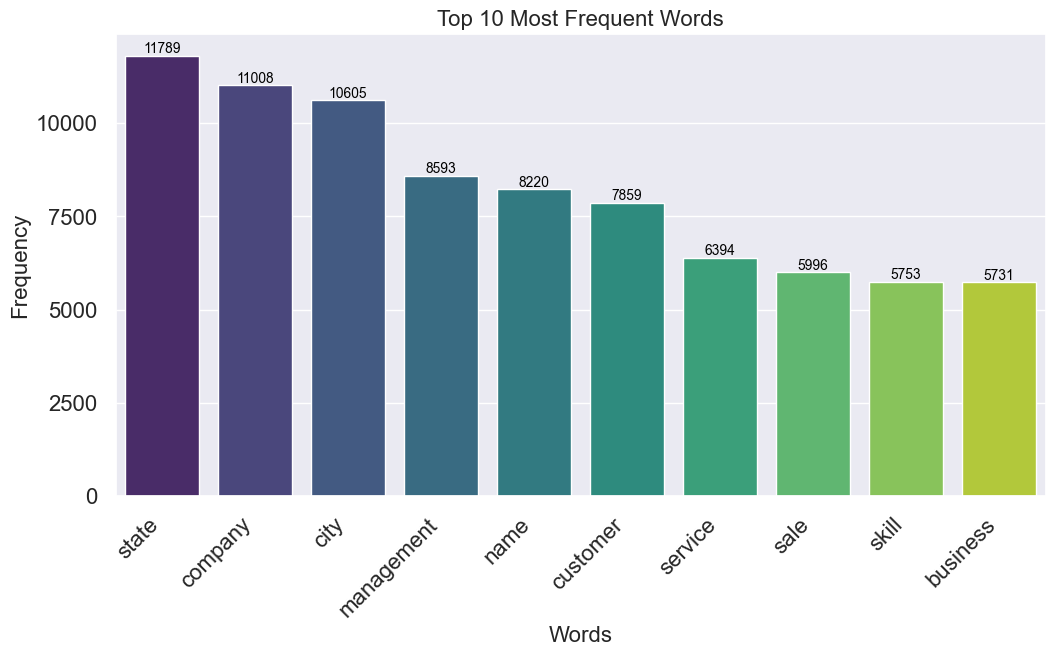

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_19876\1259295576.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_bottom = sns.barplot(x=bottom_words, y=bottom_word_freqs, palette='viridis')


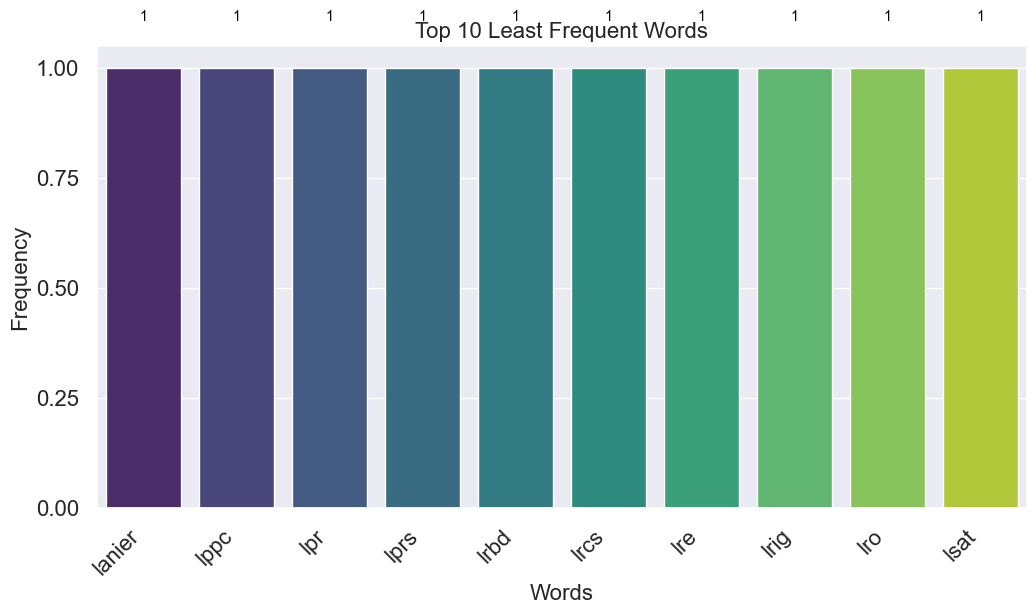

In [24]:
top_n = 10
bottom_n = 10

grouped_df_train = pd.DataFrame(bow_array_train, columns=feature_names)
grouped_df_test = pd.DataFrame(bow_array_test, columns=feature_names)

top_words = grouped_df_train.sum().sort_values(ascending=False).head(top_n).index
bottom_words = grouped_df_train.sum().sort_values(ascending=True).head(bottom_n).index

label_fontsize = 16
tick_fontsize = 16

plt.figure(figsize=(12, 6))
top_word_freqs = grouped_df_train[top_words].sum()
bar_plot = sns.barplot(x=top_words, y=top_word_freqs, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words', fontsize=label_fontsize)
plt.xlabel('Words', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

for i, v in enumerate(top_word_freqs):
    bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

plt.figure(figsize=(12, 6))
bottom_word_freqs = grouped_df_train[bottom_words].sum()
bar_plot_bottom = sns.barplot(x=bottom_words, y=bottom_word_freqs, palette='viridis')
plt.title(f'Top {bottom_n} Least Frequent Words', fontsize=label_fontsize)
plt.xlabel('Words', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

for i, v in enumerate(bottom_word_freqs):
    bar_plot_bottom.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [25]:
def get_most_frequent_words(bow_array, feature_names, labels, top_n=10):
    most_frequent_words = {}
    for label in np.unique(labels):
        label_indices = np.where(labels == label)[0]
        label_bow = bow_array[label_indices, :]
        label_word_freq = np.sum(label_bow, axis=0)
        sorted_indices = np.argsort(label_word_freq)[::-1][:top_n]
        top_words = [feature_names[i] for i in sorted_indices]
        most_frequent_words[label] = {'top_words': top_words, 'word_freq': label_word_freq[sorted_indices]}
    return most_frequent_words

In [26]:
numeric_to_label = {
    1: 'INFORMATION-TECHNOLOGY',
    2: 'BUSINESS-DEVELOPMENT',
    3: 'FINANCE',
    4: 'ADVOCATE',
    5: 'ACCOUNTANT',
    6: 'ENGINEERING',
    7: 'CHEF',
    8: 'AVIATION',
    9: 'FITNESS',
    10: 'SALES',
    11: 'BANKING',
    12: 'HEALTHCARE',
    13: 'CONSULTANT',
    14: 'CONSTRUCTION',
    15: 'PUBLIC-RELATIONS',
    16: 'HR',
    17: 'DESIGNER',
    18: 'ARTS',
    19: 'TEACHER',
    20: 'APPAREL',
    21: 'DIGITAL-MEDIA',
    22: 'AGRICULTURE',
    23: 'AUTOMOBILE',
    24: 'BPO'
}

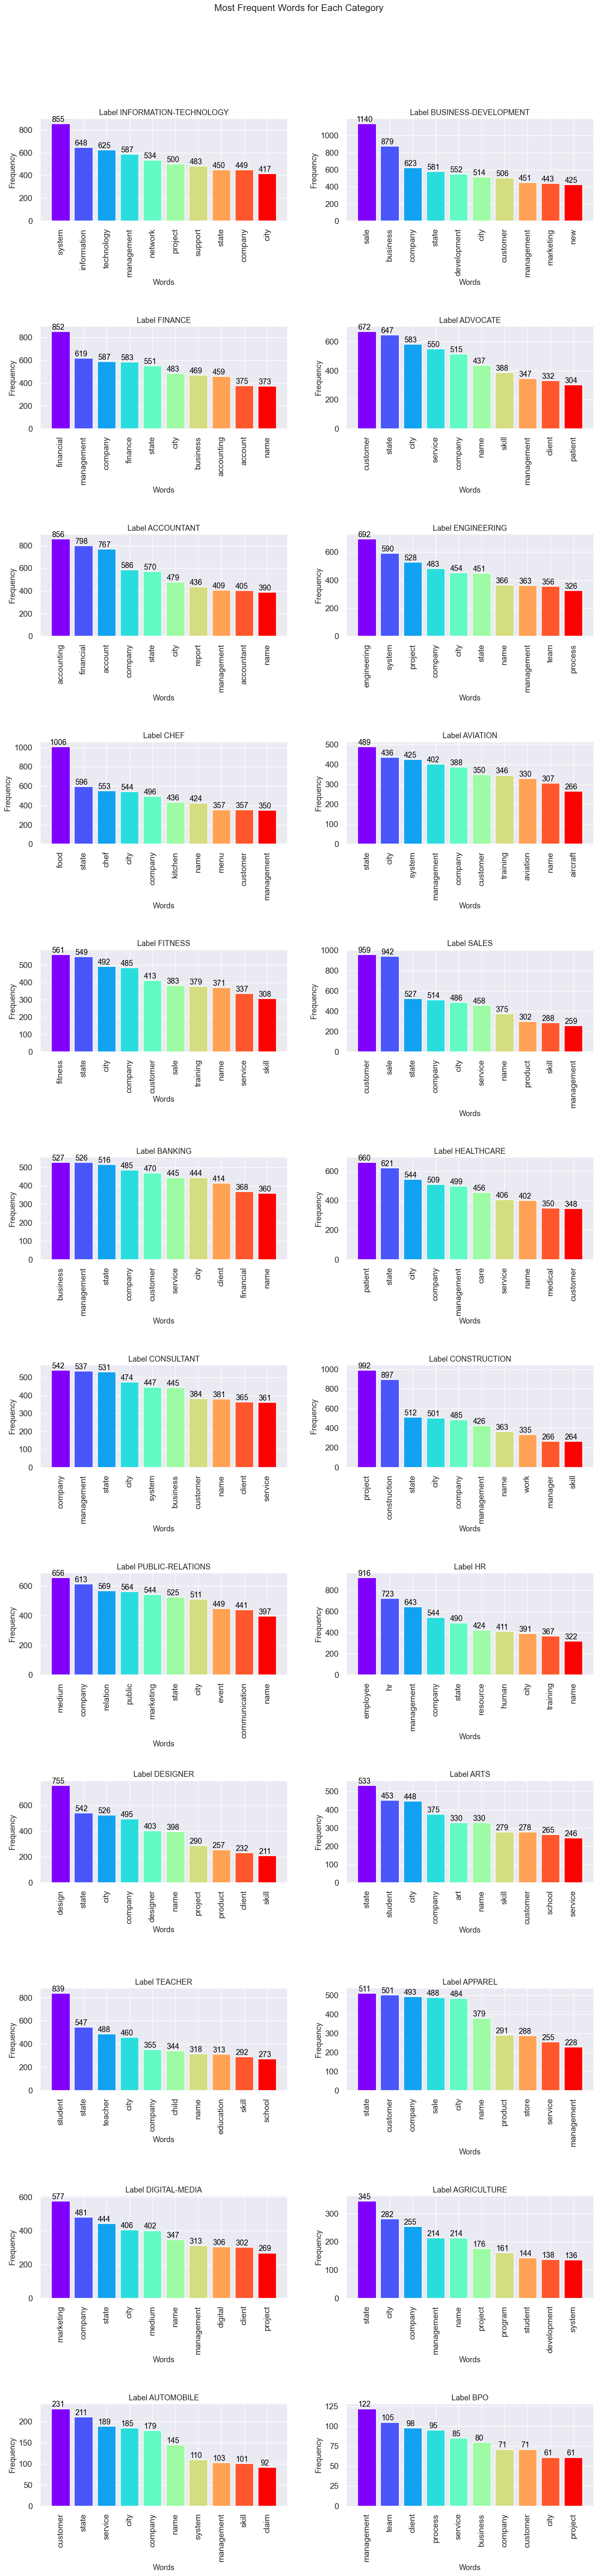

In [27]:
most_frequent_words_train = get_most_frequent_words(bow_array_train, feature_names, y_train)

num_columns = 2


num_categories = len(most_frequent_words_train)
num_rows = (num_categories + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
fig.suptitle("Most Frequent Words for Each Category", y=1.02, fontsize=16) 

axes = axes.flatten()

label_size = 13
tick_size = 14

for idx, (label, info) in enumerate(most_frequent_words_train.items()):
    category_name = numeric_to_label[label]
    top_words = info['top_words']
    word_freq = info['word_freq']
    
    indices = [np.where(feature_names == word)[0][0] for word in top_words]
    
    bars = axes[idx].bar(top_words, [np.sum(bow_array_train[y_train == label, index]) for index in indices], color=plt.cm.rainbow(np.linspace(0, 1, len(top_words))))
    axes[idx].set_title(f"Label {category_name}", fontsize=label_size)  # Adjust subplot title size
    axes[idx].set_xlabel("Words", fontsize=label_size)  # Adjust x-axis label size
    axes[idx].set_ylabel("Frequency", fontsize=label_size)  # Adjust y-axis label size
    
    # Rotate x-axis labels by 90 degrees
    axes[idx].tick_params(axis='x', rotation=90, labelsize=tick_size)  # Adjust x-axis tick size

    # Display frequency values above the bars
    for bar, freq in zip(bars, word_freq):
        axes[idx].text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(freq)), ha='center', va='bottom', fontsize=13, color='black')

    # Adjust y-axis tick size
    axes[idx].tick_params(axis='y', labelsize=tick_size)
# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
def remove_extra_word(text):
    
    extra_word=['company', 'name', 'city', 'state', 'work', 'management']
    words = text.split() 
    
    filter_word = [word for word in words if word not in extra_word]
    
    filter_text = ' '.join(filter_word)
    
    return filter_text

df_cleaned['Cleaned_text']=df_cleaned['Cleaned_text'].apply(lambda x:remove_extra_word(x))

In [29]:
X_train_bow, X_test_bow, y_train, y_test, feature_names, bow_array_train, bow_array_test = preprocess_text_data(
    df_cleaned['Cleaned_text'], df_cleaned['Labeled_category']
)

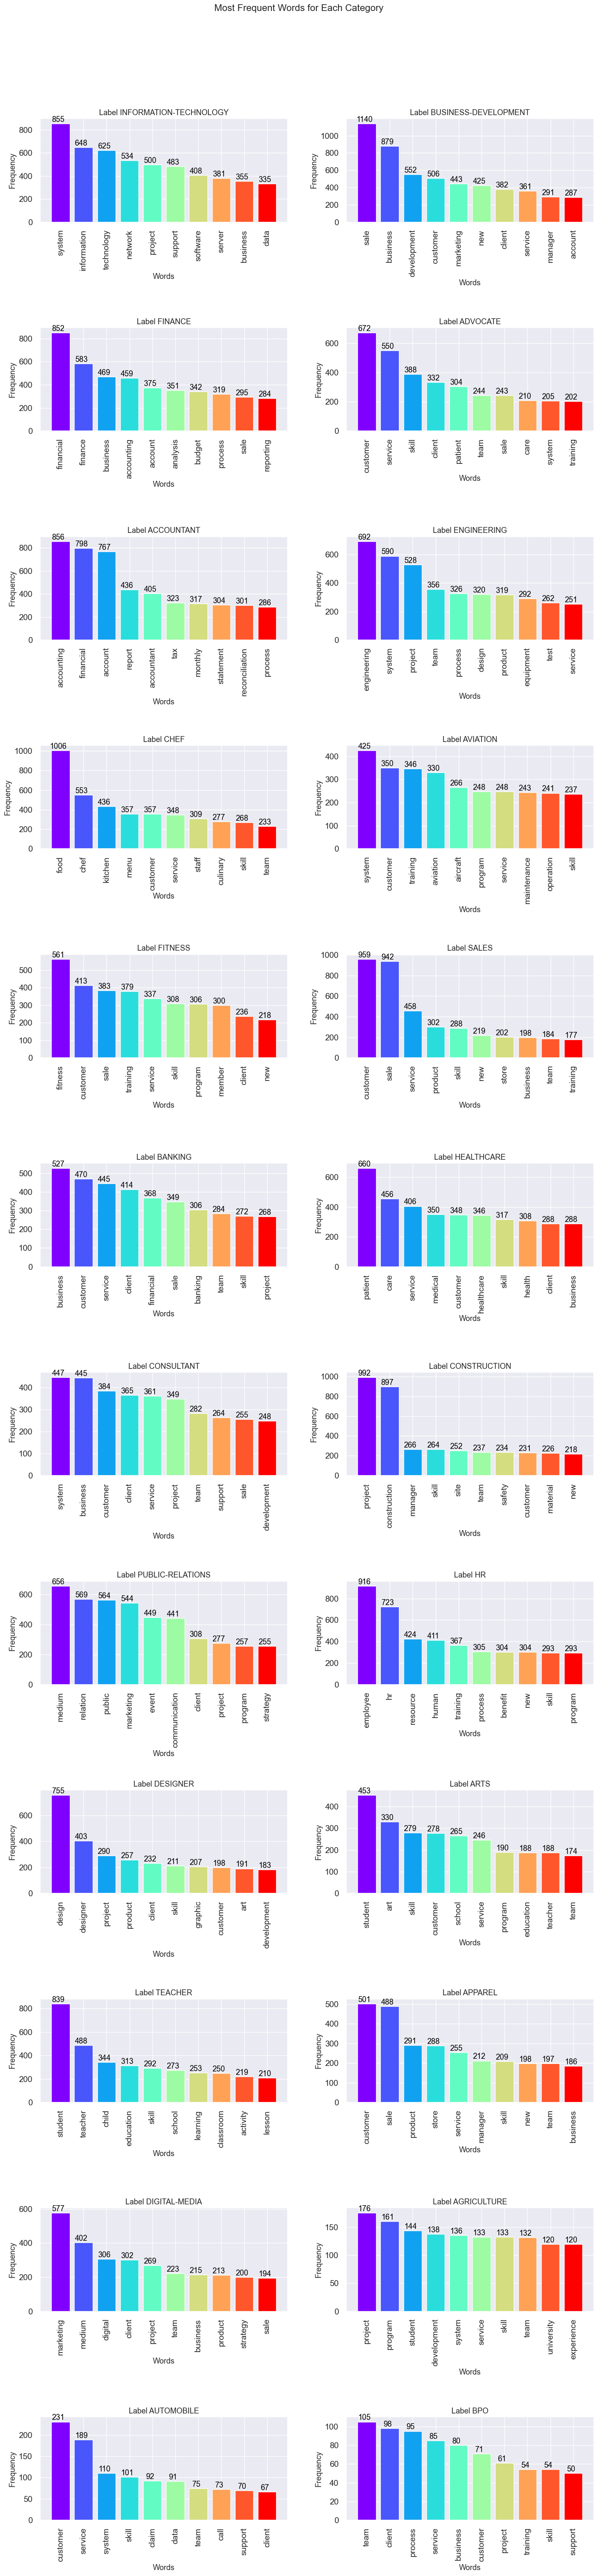

In [30]:
# Get the most frequent words for each category in training data
most_frequent_words_train = get_most_frequent_words(bow_array_train, feature_names, y_train)

# Set the number of columns for subplots
num_columns = 2

# Calculate the number of rows needed based on the number of categories and columns
num_categories = len(most_frequent_words_train)
num_rows = (num_categories + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
fig.suptitle("Most Frequent Words for Each Category", y=1.02, fontsize=16) 

# Flatten the axes array to handle the case when there is only one row
axes = axes.flatten()

label_size = 13
tick_size = 14
# Plot the most frequent words for each category with frequency values above the bars
for idx, (label, info) in enumerate(most_frequent_words_train.items()):
    category_name = numeric_to_label[label]
    top_words = info['top_words']
    word_freq = info['word_freq']
    
    indices = [np.where(feature_names == word)[0][0] for word in top_words]
    
    bars = axes[idx].bar(top_words, [np.sum(bow_array_train[y_train == label, index]) for index in indices], color=plt.cm.rainbow(np.linspace(0, 1, len(top_words))))
    axes[idx].set_title(f"Label {category_name}", fontsize=label_size)  # Adjust subplot title size
    axes[idx].set_xlabel("Words", fontsize=label_size)  # Adjust x-axis label size
    axes[idx].set_ylabel("Frequency", fontsize=label_size)  # Adjust y-axis label size
    
    # Rotate x-axis labels by 90 degrees
    axes[idx].tick_params(axis='x', rotation=90, labelsize=tick_size)  # Adjust x-axis tick size

    # Display frequency values above the bars
    for bar, freq in zip(bars, word_freq):
        axes[idx].text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(freq)), ha='center', va='bottom', fontsize=13, color='black')

    # Adjust y-axis tick size
    axes[idx].tick_params(axis='y', labelsize=tick_size)
# Adjust layout
plt.tight_layout()
plt.show()

## 4. Model Training

### SVC

In [31]:
svm = SVC()
svm.fit(bow_array_train,y_train)

### SVC With Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear',class_weight='balanced')
svm_linear.fit(bow_array_train,y_train)

SVC(class_weight='balanced', kernel='linear')

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
g_boost = GradientBoostingClassifier()
g_boost.fit(bow_array_train, y_train)

GradientBoostingClassifier()

## 5. Model Evaluation

In [ ]:
def make_classification_report(model, x_test=bow_array_test, y_test=y_test):
    test_pred = model.predict(x_test)
    print(classification_report(test_pred, y_test))

NameError: name 'bow_array_test' is not defined

In [ ]:
make_classification_report(svm)

              precision    recall  f1-score   support

           1       0.67      0.62      0.64        39
           2       0.58      0.48      0.53        44
           3       0.69      0.80      0.74        30
           4       0.60      0.32      0.42        65
           5       0.83      0.72      0.77        40
           6       0.71      0.57      0.63        44
           7       0.77      0.61      0.68        44
           8       0.63      0.49      0.55        45
           9       0.43      0.60      0.50        25
          10       0.63      0.39      0.48        57
          11       0.54      0.76      0.63        25
          12       0.26      0.36      0.30        25
          13       0.43      0.36      0.39        42
          14       0.74      0.81      0.77        31
          15       0.67      0.79      0.72        28
          16       0.73      0.73      0.73        33
          17       0.69      0.88      0.77        25
          18       0.39    

c:\Users\MSI GL65\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI GL65\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI GL65\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
